# Titanic: M.L survival prediction

# Problem Statement:

###### The sinking of the RMS Titanic is one of the most infamous shipwrecks in
history. On April 15, 1912, during her maiden voyage, the Titanic sank after
colliding with an iceberg, killing numerous passengers and crew. This
sensational tragedy shocked the international community and led to better
safety regulations for ships.
One of the reasons that the shipwreck led to such loss of life was that there
were not enough lifeboats for the passengers and crew. Although there was
some element of luck involved in surviving the sinking, some groups of people
were more likely to survive than others, such as women, children, and the
upper-class.
In this, we ask you to complete the analysis of what sorts of people were likely
to survive. In particular, we ask you to apply the tools of machine learning to
predict which passengers survived the tragedy.

# Data Dictionary

###### survival-------------------- Survival 0 = No, 1 = Yes

pclass--------- Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd

Sex-------------Sex

Age------------ Age in years

sibsp------------ # of siblings / spouses aboard the Titanic

parch------------- # of parents / children aboard the Titanic
                                                                                        
ticket------------- Ticket number

fare--------------- Passenger fare

cabin--------------- Cabin number

embarked------------- Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

pclass: A proxy for socio-economic status (SES) 1st = Upper 2nd = Middle 3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way... Sibling = brother, sister, stepbrother, stepsister Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way... Parent = mother, father Child = daughter, son, stepdaughter, stepson Some children travelled only with a nanny, therefore parch=0 for them.

# Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pylab as pylab
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler

# Data Type

#### Let's start by reading in the titanic_train.csv file into a pandas dataframe.

In [2]:
# read the train data
train = pd.read_csv(r"C:\Users\kajal\Downloads\train.csv")

In [3]:
train.shape

(891, 12)

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Handling Missing Values

###### From above we observe missing values for some features
Let's check.

In [7]:
# Checking the null percentage of missing data
missing_per = round(train.isnull().sum()/len(train)*100,2)
missing_per[missing_per != 0]

Age         19.87
Cabin       77.10
Embarked     0.22
dtype: float64

###### Out of the 891 train records, 20% of the data has no Age for the passangers and 77% of data with missing cabin information. Also 2 records dont have the Embarked port name.
Let's handle these missing data.

In [8]:
missing_count=train.isnull().sum()
missing_count[missing_count >0.0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [9]:
# Handling the missing Embarked port
train[train.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


###### Since, both these persons dont have any siblings / spouses/ parents or children. We cannot infer there Port of Embarkment.Now we can,

1. impute the missing value with the mode of Embarked port.
2. remove these two records from analysis and modeling

Going with the first option, imput the missing port of embarkment with the mode i.e S: 644

In [10]:
train['Embarked'].fillna('S',inplace=True)
train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

#### Handling the missing Age

In [11]:
train[train.Age.isnull()].Survived.value_counts()

0    125
1     52
Name: Survived, dtype: int64

In [12]:
# Average age of passangers
print('Average Age of passangers : {}'.format(train.Age.mean()))
# Mean age of passangers who survived vs the one who did not survived
train.groupby('Survived').Age.mean()

Average Age of passangers : 29.69911764705882


Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

###### Out of the 177 missing Age values there are 125 records who did not survive.
Overall the average age of passangers is 29.69 while the average among those who survived(1) is 28.3 and average age among non-survivors is 30.62.

1. One way is that we replace the null Age's with the mean of the passangers. However Age can be potential predictor of survival and hence imputing the 20% of data with mean value we may add significance bais to the model.
2. Another approach to impute can be to create a regression model to predict the missing age of passangers
3. Ignore these 177 records. This will lower the train data size but will avoid adding bias

We will impute the missing values with random integers lying between 1 standard deviation away from mean.

In [13]:
# creating a custom function
def imputeAge(df,column) :
    '''This function will impute the missing values with random integer value
    lying within 1 standard deviation of the mean'''
    dataset = df[:]
    mean = df[column].mean()
    std = df[column].std()
    is_null = dataset[column].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset[column].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset[column] = age_slice
    dataset[column] = df[column].astype(int)
#train["Age"].isnull().sum()

In [14]:
imputeAge(train,'Age')
train["Age"].isnull().sum()

0

In [15]:
train.Age.describe()

count    891.000000
mean      29.611863
std       13.563585
min        0.420000
25%       21.000000
50%       29.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

#### Handling the missing Cabin

###### There are 70% records with missing Cabin value. Since the percentage missing data is very high, it will be best if we ignore this feature by dropping the entire column from analysis.

In [16]:
train.drop('Cabin',axis=1,inplace=True)
# Check missing value
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

###### There are no more missing values in the train set. We can start Analysing the data in depth.

# Treatment Outliers

In [17]:
# Checking for outliers in the continuous variables
num_train = train[['Age','Fare']]
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_train.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Age,Fare
count,891.000000,891.000000
mean,29.611863,32.204208
std,13.563585,49.693429
min,0.420000,0.000000
25%,21.000000,7.910400
50%,29.000000,14.454200
75%,38.000000,31.000000
90%,47.000000,77.958300
95%,54.000000,112.079150
99%,65.000000,249.006220


#### Age of the passangers are gradually increasing suggesting no outliers in Age.


In [18]:
#fareMean=train.Fare.mean()
#fareSd=train.Fare.std()
#train = train[np.abs(train['Fare']-fareMean) <= (3*fareSd)]
q = train["Fare"].quantile(0.99)
train = train[train['Fare'] < q]

In [19]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
train['Fare'].describe(percentiles=[.25, .5, .75, .90, .95, .99])

count    882.000000
mean      29.002508
std       36.569302
min        0.000000
25%        7.895800
50%       14.454200
75%       30.500000
90%       73.500000
95%       93.500000
99%      211.337500
max      247.520800
Name: Fare, dtype: float64

#### We see that the Fare jumps dramatically after 99 pecentile from 211.33 to 247.52. This suggest there are some outliers towards the end of the Fare distribution.

# Exploratory Data Analysis

### Univariate Analysis

#### Feature: PassengerId

In [20]:
train.PassengerId.head()

0    1
1    2
2    3
3    4
4    5
Name: PassengerId, dtype: int64

###### This column clearly is a sequential Id assigned to the passenger. This wont be of any significance in predicting the survival. We will later remove this column from analysis.

#### Feature: Survived

###### This is the dependent variable which needs to be predicted.

In [21]:
print(train.Survived.value_counts())
### Checking the Survival Rate
survival_rate = round((sum(train[train['Survived']==1]['Survived'])/len(train['Survived'].index))*100,2)
print('Survival Rate : {}'.format(survival_rate))

0    547
1    335
Name: Survived, dtype: int64
Survival Rate : 37.98


###### In this training data we have 549 passangers who survived and 342 passangers who din't survive.

The training data has a Survival Rate of 38.38%

In [24]:
def showLabels(ax, d=None):
    plt.margins(0.2, 0.2)
    rects = ax.patches
    i = 0
    locs, labels = plt.xticks() 
    counts = {}
    if not d is None:
        for key, value in d.items():
            counts[str(key)] = value
            
  # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        if d is None:
            label = "{:.1f}".format(y_value)
        else:
            try:
                label = "{:.1f}%".format(y_value) + "\nof " + str(counts[str(labels[i].get_text())])
            except:
                label = "{:.1f}%".format(y_value)
        
        i = i+1
          

In [25]:
def plot_percentages(dataframe, by, sortbyindex=False):
    #plt.subplot(1, 2, 1)
    values = (dataframe[by].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ax = values.plot.bar(color=sns.color_palette('deep',16))
    ax.set_ylabel('Total % in dataset', fontsize=16)
    ax.set_xlabel(by, fontsize=12)
    showLabels(ax)
    #plt.subplot(1, 2, 2)
    grp = dataframe.groupby(['Survived',by])[by].count()
    cnt = dataframe.groupby(by)[by].count()
    #print(grp)
    percentages = grp.unstack() * 100 / cnt.T
    #print(percentages)
    ax = percentages.plot.bar(color=sns.color_palette('deep', 16))
    ax.set_ylabel('% Survived', fontsize=16)
    showLabels(ax)

#### Feature: Pclass

###### This feature tells us about the Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd of onboard passengers.

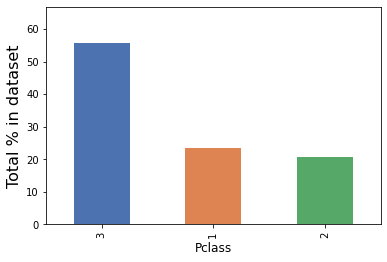

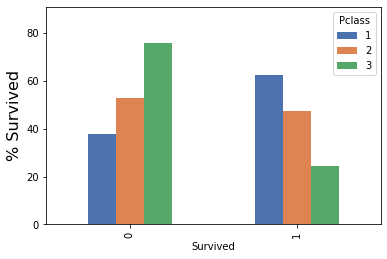

In [26]:
#showLabels(sns.countplot(train.Pclass))
plot_percentages(train,'Pclass')
plt.show()

#### Feature: Name

###### This column has the names of all the passangers onboard.

In [27]:
print('Number of unique Passangers: {} '.format(len(train.Name.unique())))
train.Name.head()

Number of unique Passangers: 882 


0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

###### Considering Name as primary Key. We see that there are no duplicate records in the data set and all passangers have a unique name.
We will use the Name feature to extract the Titles from the Name, so that we can build a new feature out of that.

In [28]:
# Extracting the title from the name
train.Name.str.extract(' ([A-Za-z]+)\.', expand=False).value_counts()

Mr          513
Miss        177
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Don           1
Jonkheer      1
Mme           1
Countess      1
Lady          1
Capt          1
Ms            1
Sir           1
Name: Name, dtype: int64

In [29]:
def extract_createTitle(df,column):
    '''This function returns the list of titles from the passangers Name'''
    dataset = df
    #titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    # extract titles
    dataset['Title'] = dataset[column].str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    return dataset['Title']
    # convert titles into numbers
    #dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    #dataset['Title'] = dataset['Title'].fillna(0)

In [30]:
train['Title'] = extract_createTitle(train,'Name')

In [31]:
train.Title.value_counts()

Mr        513
Miss      180
Mrs       126
Master     40
Rare       23
Name: Title, dtype: int64

#### Feature: Sex

###### This column information about the sex of the passanger, Male or Female

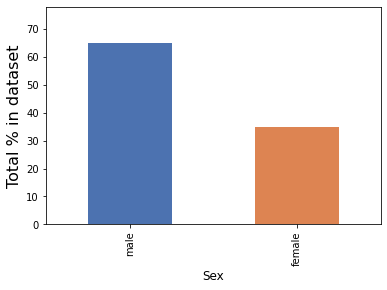

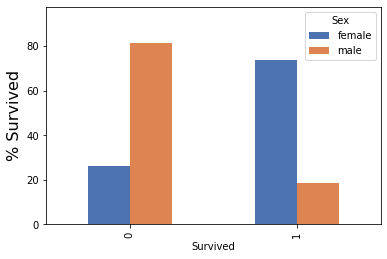

In [32]:
plot_percentages(train,'Sex')

###### This confirms that females and child were asked to evacuated first.
Men had a low probability of surviving.

#### Feature: Age

###### This column information about the Age of the passanger.

C:\Users\kajal\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


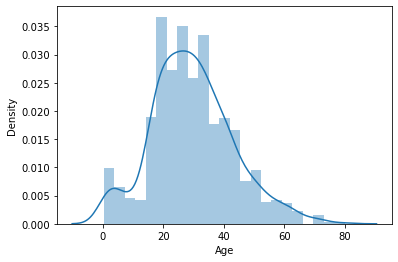

Mean Age : 29.602233560090703


In [33]:
sns.distplot(train.Age)
plt.show()
print('Mean Age : {}'.format(train.Age.mean()))

In [34]:
train.groupby('Survived').Age.mean()

Survived
0    30.359232
1    28.366179
Name: Age, dtype: float64

#### Overall the average age of passangers onboard was 29.35
Mean age of passanger who survived was 28.36
Mean age of passangers who did not survive was 30.35

In [35]:
bins = [0,10,20,30,40,50,60,70,np.inf]
labels = ['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70+']
age_groups = pd.cut(train.Age, bins, labels=labels)
train['age_group'] = age_groups

In [36]:
#bins = [0, 12, 17, 60, np.inf]
#labels = ['child', 'teenager', 'adult', 'elder']
#age_groups = pd.cut(train.Age, bins, labels=labels)
#train['age_group'] = age_groups

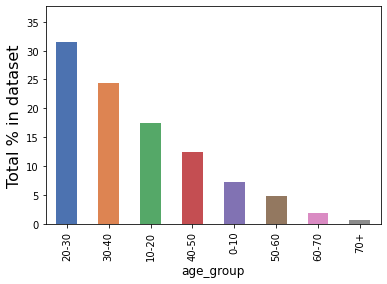

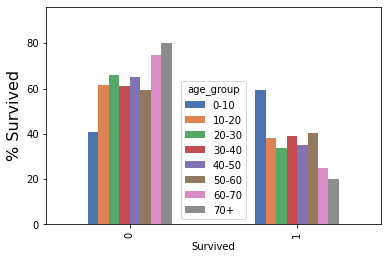

In [37]:
# Droping the orignal Age Column
#train.drop('AgeBin',axis=1,inplace=True)
plot_percentages(train,'age_group')

###### Majority passangers on board,fall in the age group of 20-30

children below the age of 10 years managed to survive. This further confirms that childern were evecuated first.

#### Feature: SibSp

###### The dataset defines family relations in this way... Sibling = brother, sister, stepbrother, stepsister Spouse = husband, wife (mistresses and fiancés were ignored)

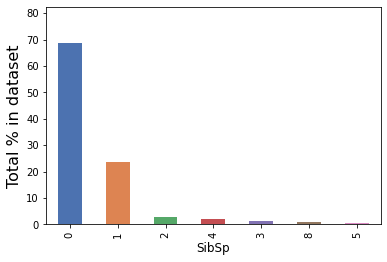

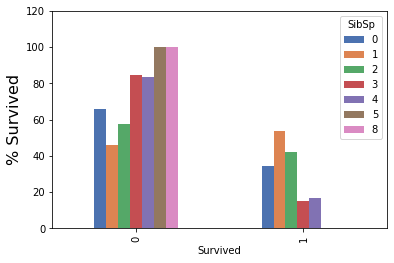

In [38]:
plot_percentages(train,'SibSp')

###### Mostly passangers did not have any Siblings or Spouse
Passangers having 1 Sibling or 1 spouse had greated chances of survival. Chances of such passangers survived.

#### Feature: Parch

###### The dataset defines family relations in this way... Parent = mother, father Child = daughter, son, stepdaughter, stepson Some children travelled only with a nanny, therefore parch=0 for them.

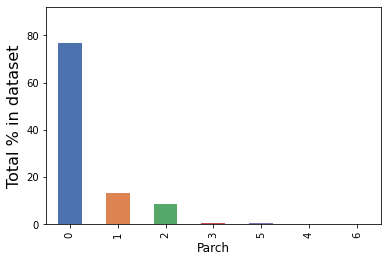

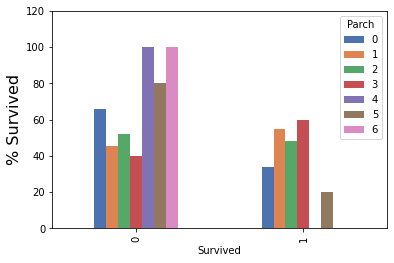

In [39]:
plot_percentages(train,'Parch')

###### Many of the passangers did not have any parents/child onboard
If passangers survival rate is high when the number of parents/child onboard = 1

In [40]:
train.loc[(train['Parch'] == 0)  & (train['SibSp'] == 0)]['Survived'].value_counts(normalize=True)

0    0.699065
1    0.300935
Name: Survived, dtype: float64

###### Passangers survival percentage is very small if the passanger was travelling alone i.e without any Sibling, Spouce, Parent or Child

#### Feature: Ticket

In [41]:
train.Ticket.head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [42]:
# How many unique Ticket are there 
print('There are {} Unique Tickets values for the passangers'.format(len(train.Ticket.unique())))

There are 678 Unique Tickets values for the passangers


#### Feature: Fare

C:\Users\kajal\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


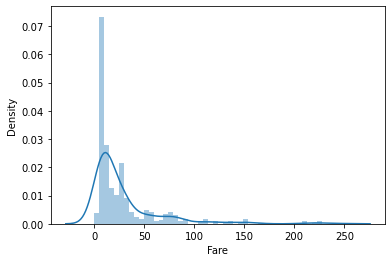

count    882.000000
mean      29.002508
std       36.569302
min        0.000000
25%        7.895800
50%       14.454200
75%       30.500000
max      247.520800
Name: Fare, dtype: float64

In [43]:
sns.distplot(train.Fare)
plt.show()
train.Fare.describe()

###### Fare is a continuos variable. Let's cut the Fare into discreate fare ranges or Bins for easier interpretation.

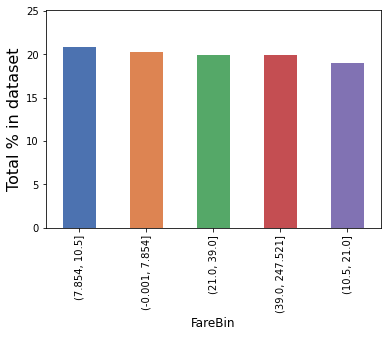

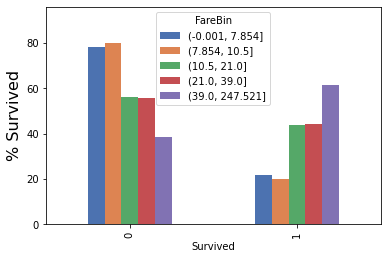

In [44]:
# Creating a new column to store the Fare range for each passanger
train['FareBin']=pd.qcut(train.Fare,q=5)
plot_percentages(train,'FareBin')

###### It can be obeserved that the Fare has some positive correlation with the survival of the passanger.
The chances of survival of a passanger are improving as the fare is increasing.

#### Feature: Cabin

###### Passenger Cabin number. This column was dropped earlier from the analysis as 77 of the Canin entries were empty/Null.

#### Feature: Embarked

###### Passenger port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

In [45]:
train.Embarked.value_counts()

S    642
C    163
Q     77
Name: Embarked, dtype: int64

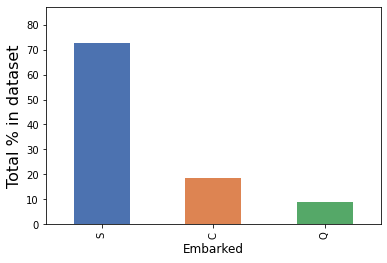

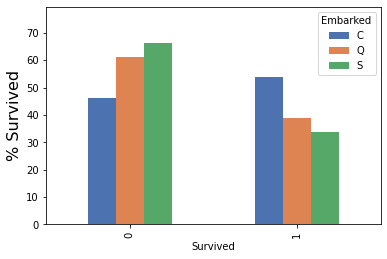

In [46]:
plot_percentages(train,'Embarked')

###### Most of the passangers, are embarked from S=Southampton port.

Survived:
1. passangers survived who embarked from Cherbourg
2. passangers survived who embarked from Queenstown
3. passangers survived who embarked from Southhampton port

# Bivariate Analysis

#### Pclass and Sex

In [47]:
train.groupby(['Pclass','Sex']).Survived.value_counts(normalize=False)

Pclass  Sex     Survived
1       female  1            86
                0             3
        male    0            75
                1            43
2       female  1            70
                0             6
        male    0            91
                1            17
3       female  0            72
                1            72
        male    0           300
                1            47
Name: Survived, dtype: int64

###### We already saw that the % of females survivers were way too high.

Among the survived most of them travelled either 1st Class or 2nd Class.

#### Age and Sex

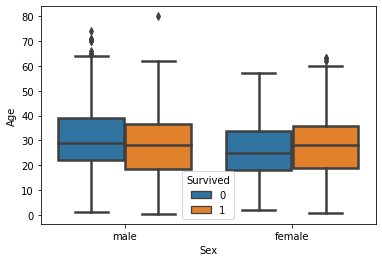

In [48]:
ax = sns.boxplot(x="Sex", y="Age", hue="Survived",data=train, linewidth=2.5)

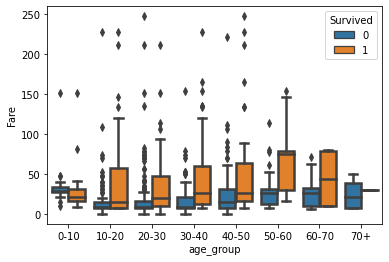

In [49]:
ax = sns.boxplot(x="age_group", y="Fare", hue="Survived",data=train, linewidth=2.5)

In [50]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,age_group,FareBin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,20-30,"(-0.001, 7.854]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,30-40,"(39.0, 247.521]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,20-30,"(7.854, 10.5]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,30-40,"(39.0, 247.521]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,30-40,"(7.854, 10.5]"


###### Removing variables irrelevent for predicting Survival

In [51]:
nonPredicter=['PassengerId','Name','Ticket']
train.drop(nonPredicter,axis=1,inplace=True)

##### Handling Categorical Variables

In [52]:
# Encoding Sex values male and female to binary 0 and 1.
sexdic={'male': 0 , 'female': 1}
train['Sex'] = train['Sex'].map(sexdic)

##### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [53]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Title', 'age_group', 'FareBin'],
      dtype='object')

In [54]:
dummy = pd.get_dummies(train[['Embarked','Title','age_group','FareBin']], drop_first=True)
# Adding the results to the master dataframe
train = pd.concat([train, dummy], axis=1)

In [55]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,age_group,...,age_group_20-30,age_group_30-40,age_group_40-50,age_group_50-60,age_group_60-70,age_group_70+,"FareBin_(7.854, 10.5]","FareBin_(10.5, 21.0]","FareBin_(21.0, 39.0]","FareBin_(39.0, 247.521]"
0,0,3,0,22.0,1,0,7.2500,S,Mr,20-30,...,1,0,0,0,0,0,0,0,0,0
1,1,1,1,38.0,1,0,71.2833,C,Mrs,30-40,...,0,1,0,0,0,0,0,0,0,1
2,1,3,1,26.0,0,0,7.9250,S,Miss,20-30,...,1,0,0,0,0,0,1,0,0,0
3,1,1,1,35.0,1,0,53.1000,S,Mrs,30-40,...,0,1,0,0,0,0,0,0,0,1
4,0,3,0,35.0,0,0,8.0500,S,Mr,30-40,...,0,1,0,0,0,0,1,0,0,0


In [56]:
# We have created dummies for the below variables, so we can drop them
train = train.drop(['Embarked','Title','age_group','FareBin'], 1)

## Scaling

In [57]:
X_train = train.drop('Survived',axis=1)
y_train = train['Survived']

In [58]:
scaler = StandardScaler()
X_train[['Age','Fare']] = scaler.fit_transform(X_train[['Age','Fare']])
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,...,age_group_20-30,age_group_30-40,age_group_40-50,age_group_50-60,age_group_60-70,age_group_70+,"FareBin_(7.854, 10.5]","FareBin_(10.5, 21.0]","FareBin_(21.0, 39.0]","FareBin_(39.0, 247.521]"
0,3,0,-0.560846,1,0,-0.595167,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0
1,1,1,0.619535,1,0,1.156839,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,3,1,-0.265750,0,0,-0.576699,0,1,1,0,...,1,0,0,0,0,0,1,0,0,0
3,1,1,0.398214,1,0,0.659328,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
4,3,0,0.398214,0,0,-0.573279,0,1,0,1,...,0,1,0,0,0,0,1,0,0,0


# Correlation Matrix

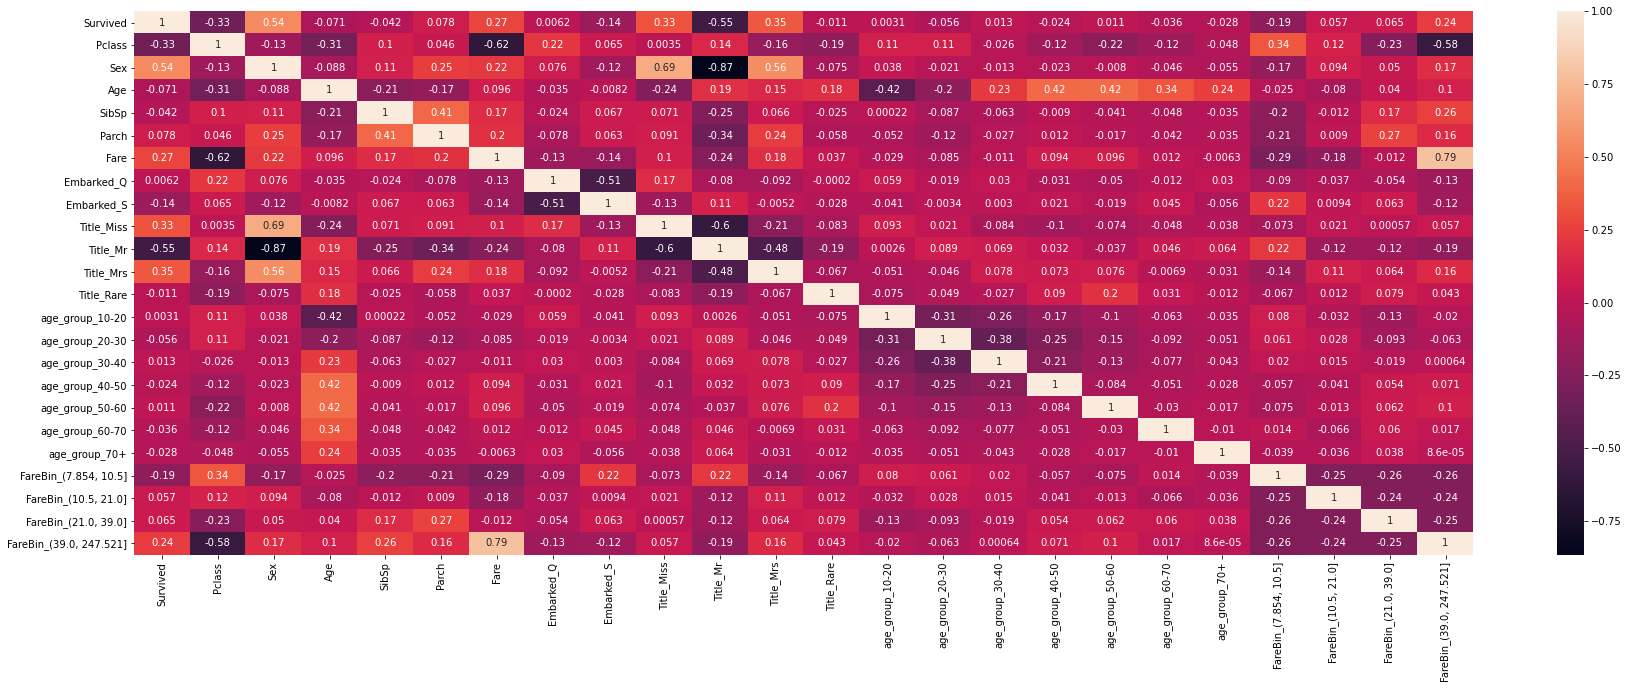

In [59]:
# Let's see the correlation matrix 
plt.figure(figsize = (30,10))        
sns.heatmap(train.corr(),annot = True)
plt.show()

###### The correlation matrix above shows how each of the variable is related to the other.
This only shows the a probable relation and does not imply causation.
The feature Sex is highly co-related to Title_Miss and TitleMrs. Let's remove the Title* from analysis as the Sex of the passanger is a more interpretable predictor of survival.

In [60]:
X_train = X_train.drop(['Title_Mrs','Title_Miss','Title_Mr','Title_Rare'],axis=1)

# Model Building

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

In [63]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,...,age_group_20-30,age_group_30-40,age_group_40-50,age_group_50-60,age_group_60-70,age_group_70+,"FareBin_(7.854, 10.5]","FareBin_(10.5, 21.0]","FareBin_(21.0, 39.0]","FareBin_(39.0, 247.521]"
330,3,1,21.0,2,0,23.2500,1,0,1,0,...,1,0,0,0,0,0,0,0,1,0
859,3,0,33.0,0,0,7.2292,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
824,3,0,2.0,4,1,39.6875,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
805,3,0,31.0,0,0,7.7750,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
269,1,1,35.0,0,0,135.6333,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,1,1,39.0,1,1,110.8833,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
847,3,0,35.0,0,0,7.8958,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
342,2,0,28.0,0,0,13.0000,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
529,2,0,23.0,2,1,11.5000,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0


# Training and Predicting

In [64]:
from sklearn.linear_model import Perceptron
logmodel = Perceptron ()
logmodel.fit(X_train,y_train)

Perceptron()

In [65]:
predictions = logmodel.predict(X_test,)

In [66]:
predictions

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0], dtype=int64)

# Model Evaluation

#### We can check precision,recall,f1-score using classification report!

In [67]:
from sklearn.metrics import classification_report

In [68]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.94      0.71      0.81       213
           1       0.41      0.81      0.54        52

    accuracy                           0.73       265
   macro avg       0.67      0.76      0.68       265
weighted avg       0.83      0.73      0.76       265



In [69]:
from sklearn.metrics import accuracy_score
accuracy_score(predictions,y_test)

0.7320754716981132

#### The accuracy of prediction model Result is 73.20% 